In [14]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import datetime as dt
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from gensim.models import word2vec

from sklearn.manifold import TSNE
from subprocess import check_output

In [15]:
Death_Row = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Texas%20Death%20Row%20Executions%20Info%20and%20Last%20Words/death-row.csv")
non_us = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Texas%20Death%20Row%20Executions%20Info%20and%20Last%20Words/non-us-offenders.csv")
non_on = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Texas%20Death%20Row%20Executions%20Info%20and%20Last%20Words/not-on-death-row.csv")
offenders = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Texas%20Death%20Row%20Executions%20Info%20and%20Last%20Words/offenders.csv",encoding = "latin1")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

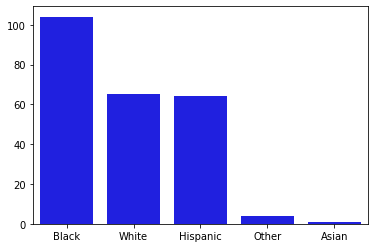

In [16]:
DR_Race = Death_Row['Race'].value_counts()
sns.barplot(DR_Race.index,DR_Race.values,color="b")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

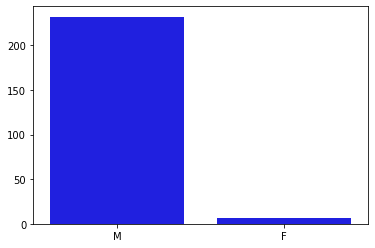

In [17]:
DR_Gender = Death_Row['Gender'].value_counts()
sns.barplot(DR_Gender.index,DR_Gender.values,color="b")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

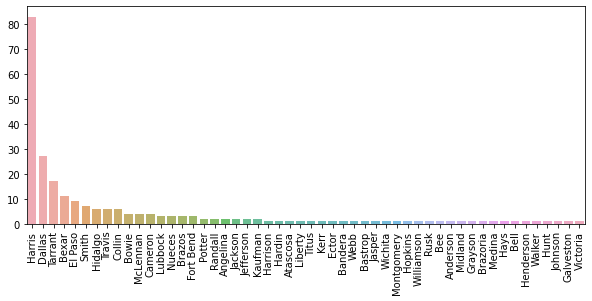

In [18]:
DR_County = Death_Row['County'].value_counts()
plt.figure(figsize=(10,4))
plt.xticks(rotation = 'vertical')
sns.barplot(DR_County.index,DR_County.values,alpha=0.8)

In [19]:
DR_County

Harris        83
Dallas        27
Tarrant       17
Bexar         11
El Paso        9
Smith          7
Hidalgo        6
Travis         6
Collin         6
Bowie          4
McLennan       4
Cameron        4
Lubbock        3
Nueces         3
Brazos         3
Fort Bend      3
Potter         2
Randall        2
Angelina       2
Jackson        2
Jefferson      2
Kaufman        2
Harrison       1
Hardin         1
Atascosa       1
Liberty        1
Titus          1
Kerr           1
Ector          1
Bandera        1
Webb           1
Bastrop        1
Jasper         1
Wichita        1
Montgomery     1
Hopkins        1
Williamson     1
Rusk           1
Bee            1
Anderson       1
Midland        1
Grayson        1
Brazoria       1
Medina         1
Hays           1
Bell           1
Henderson      1
Walker         1
Hunt           1
Johnson        1
Galveston      1
Victoria       1
Name: County, dtype: int64

Maximum Year 1993
Minimum Year 1940


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


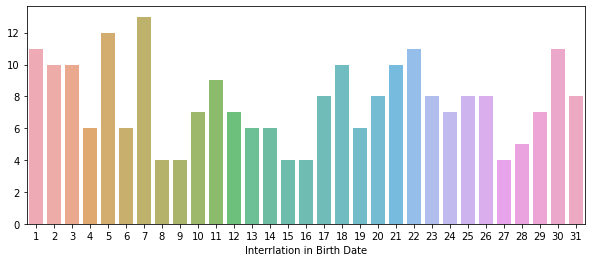

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


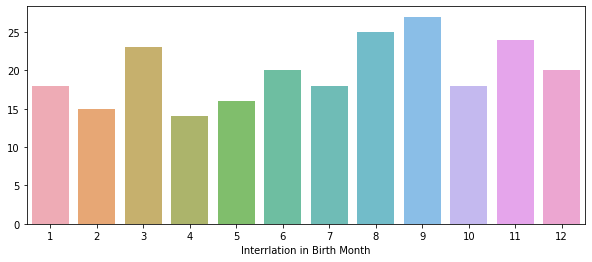

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


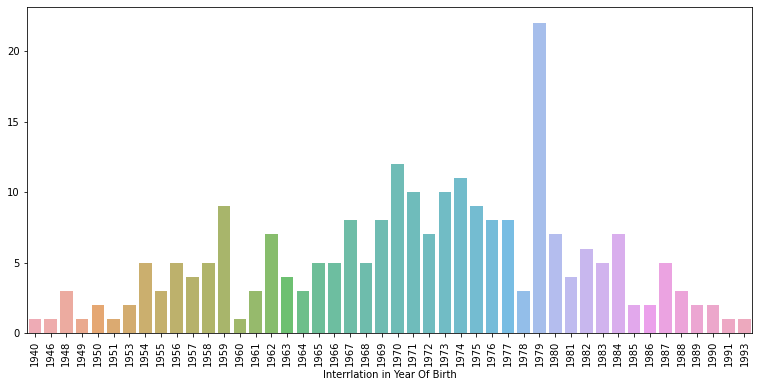

In [20]:
Death_Row['Date of Birth'] = pd.to_datetime(Death_Row['Date of Birth'])
Death_Row['day'] = pd.DatetimeIndex(Death_Row['Date of Birth']).day 
Death_Row['month'] = pd.DatetimeIndex(Death_Row['Date of Birth']).month
Death_Row['year'] = pd.DatetimeIndex(Death_Row['Date of Birth']).year


YM= Death_Row['year'].max()
YMI = Death_Row['year'].min()

print('Maximum Year', YM)
print ('Minimum Year', YMI)

Dobd = Death_Row['day'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(Dobd.index, Dobd.values, alpha=0.8)
plt.xlabel("Interrlation in Birth Date")
plt.show()

Dobm = Death_Row['month'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(Dobm.index, Dobm.values, alpha=0.8)
plt.xlabel("Interrlation in Birth Month")
plt.show()

Doby= Death_Row['year'].value_counts()
plt.figure(figsize=(13,6))
sns.barplot(Doby.index, Doby.values, alpha=0.8)
plt.xticks(rotation = 'vertical')
plt.xlabel("Interrlation in Year Of Birth")
plt.show()

In [21]:
Death_Row['Date of Offense'] = pd.to_datetime(Death_Row['Date of Offense'])
Death_Row['Date Received'] = pd.to_datetime(Death_Row['Date Received'])
Death_Row['Timefor_Justice'] = Death_Row['Date Received'] - Death_Row['Date of Offense']
Death_Row['Timefor_Justice'].head(10)

0    2474 days
1    3446 days
2    1240 days
3     938 days
4    1421 days
5    1706 days
6    1080 days
7    1450 days
8     628 days
9   12449 days
Name: Timefor_Justice, dtype: timedelta64[ns]

In [22]:
Death_Row["Timefor_Justice"].max()

Timedelta('13717 days 00:00:00')

In [23]:
Death_Row["Timefor_Justice"].min()

Timedelta('-74 days +00:00:00')

In [24]:
offenders.head(1)

,Execution #,Last Name,First Name,TDCJ Number,Age,Date,Race,County,Last Statement
0,542,Bigby,James,997,61,3/14/17,White,Tarrant,"Yes, I do, Grace Kehler is that you? I have gi..."


In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import*
senti = SentimentIntensityAnalyzer()

offenders['Senti_Compound_Score'] = offenders['Last Statement'].apply(lambda x : senti.polarity_scores(x)['compound'])
offenders['Neutral_score'] = offenders['Last Statement'].apply(lambda x : senti.polarity_scores(x)['neu'])
offenders['Positive_score'] = offenders['Last Statement'].apply(lambda x : senti.polarity_scores(x)['pos'])
offenders['Negative_score'] = offenders['Last Statement'].apply(lambda x : senti.polarity_scores(x)['neg'])

offenders.loc[offenders.Senti_Compound_Score >0 ,'Overall_Sentiment']='Positive'
offenders.loc[offenders.Senti_Compound_Score == 0, 'Overall_Sentiment'] = 'Neutral'
offenders.loc[offenders.Senti_Compound_Score < 0,'Overall_Sentiment'] = 'Negative'

<AxesSubplot:title={'center':'Last Statement'}>

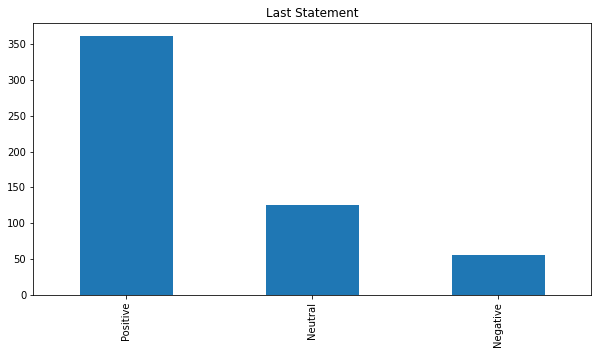

In [29]:
plt.figure(figsize=(10,5)) 
offenders.Overall_Sentiment.value_counts().plot(kind='bar',title="Last Statement")

In [30]:
%%timeit
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s
offenders['Last Statement'] = [cleaning(s) for s in offenders['Last Statement']]

35.6 ms ± 637 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
offenders["Last Statement"] = offenders["Last Statement"].str.lower().str.split()
offenders['Last Statement'] = offenders['Last Statement'].apply(lambda x: [item for item in x if item not in stop])

In [32]:
words = pd.Series(' '.join(offenders['Last Statement'].astype(str)).lower().split(" ")).value_counts()[:25]
words

'love',       645
'family',     306
'know',       303
'thank',      258
'sorry',      236
'god',        211
'like',       199
'want',       191
'would',      180
'say',        155
'life',       147
'hope',       146
'forgive',    138
'lord',       132
'going',      125
'tell',       118
'take',       112
'people',     111
['none']      110
['yes',       109
'one',        109
'ya',         106
'peace',      104
'see',        103
'give',        92
dtype: int64

<AxesSubplot:>

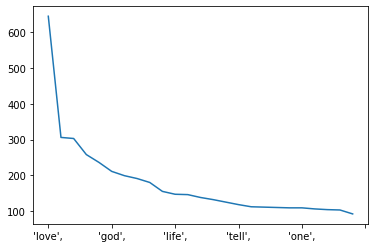

In [33]:
words.plot()